## `Descripción General del Proyecto`  

### Diccionario de Datos
| Variable   | Definición                    | Clave                                     |
|------------|-------------------------------|-------------------------------------------|
| survival   | Supervivencia                 | 0 = No, 1 = Sí                            |
| pclass     | Clase del ticket              | 1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase  |
| sex        | Sexo                          |                                           |
| Age        | Edad en años                  |                                           |
| sibsp      | Nº de hermanos/esposos a bordo|                                           |
| parch      | Nº de padres/hijos a bordo    |                                           |
| ticket     | Número de ticket              |                                           |
| fare       | Tarifa del pasajero           |                                           |
| cabin      | Número de cabina              |                                           |
| embarked   | Puerto de embarque            | C = Cherburgo, Q = Queenstown, S = Southampton |

### Notas sobre las Variables
- **pclass**: Una aproximación al estatus socioeconómico (SES)
  - 1ª clase = Alta
  - 2ª clase = Media
  - 3ª clase = Baja
- **age**: 
  - Fraccional si es menor de 1 año.
  - Las edades estimadas están en el formato `xx.5`.
- **sibsp**: Define relaciones familiares como:
  - Hermano = hermano, hermana, hermanastro, hermanastra.
  - Cónyuge = esposo, esposa (se ignoran amantes y prometidos).
- **parch**: Define relaciones familiares como:
  - Padre/madre = madre, padre.
  - Hijo = hija, hijo, hijastra, hijastro.
  - Nota: Algunos niños viajaron únicamente con una niñera, por lo que `parch=0` en esos casos.



## `Importaciones`  

In [82]:
# importaciones 

import pandas as pd
import sys
sys.path.append('../src') 
from utils import columnas_a_minusculas
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# importaciones 

import pandas as pd

# Importo CSV Train y Test
# Train
path_train = 'C:\\Users\\dalarroy\\OneDrive - NTT DATA EMEAL\\Escritorio\\Titanic_project\\data\\raw\\train.csv'
df_train = pd.read_csv(path_train)

# Test
path_test = 'C:\\Users\\dalarroy\\OneDrive - NTT DATA EMEAL\\Escritorio\\Titanic_project\\data\\raw\\test.csv'
df_test =pd.read_csv(path_test)

print(f'El df train es: \n {df_train.head(5)} \n El df test es: \n  {df_test.head(5)}')

# Renombro el df_train para que sea más facil trabajarlo
df = df_train

El df train es: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

## `EDA Exploratory Data Analysis`  

In [84]:
# Paso todas las columnas a minuscula
df = columnas_a_minusculas(df)

In [85]:
# print inicial
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# Forma y estructura del df "(891, 12)"
df.shape

(891, 12)

## Nulos

In [87]:
# Contar nulos
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [88]:
# Ver que tan significativo es
df.isna().mean()

passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
cabin          0.771044
embarked       0.002245
dtype: float64

Cabin tiene 77% de nulos, hay que decidir que hacer al respecto

## Resumen estadistico

In [89]:
# #resumen estadístico para columnas numericas
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- survived:
En promedio se salvaron 38% de las personas

- age: 
El promedio de edad fue de 29,69 años
La persona mas grande tenía 80 años y la más joven 4 meses

- fare:
La tarifa en promedio era de 32,204 
La tarifa más costosa era de 512,329 y la más barata (gratis, seguramente gente que trabajaba en el barco)

In [90]:
#resumen estadístico para las columnas de tipo object (cadenas de texto o categóricas) 
df.describe(include="O")

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


- Tickets: 
Hay 681 y son 891 personas. Hay 210 tickets repetidos.
El ticket más repetido fue el 347082 y se repitió 7 veces (Familia numerosa?)

- Embarked:
Hay 3 lugares de embarque
El embarque más repetido fue "S"

- Sexo:
Había más hombres que mujeres (577)


## Visualizaciones

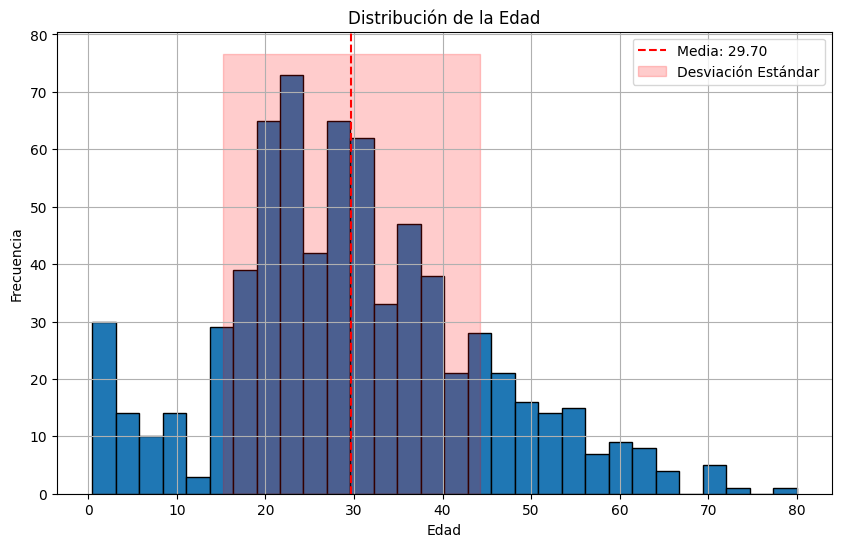

In [91]:
# Histograma de la edad
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='k')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Agregar una línea vertical punteada en la posición de la media
mean_age = df['age'].mean()
#desviación estandar
std_dev_age = df['age'].std()

plt.axvline(mean_age, color='r', linestyle='--', label=f'Media: {mean_age:.2f}')
# Agregar bandas de desviación estándar
plt.fill_betweenx(
    [0, plt.ylim()[1]],
    mean_age - std_dev_age,
    mean_age + std_dev_age,
    color='r',
    alpha=0.2,
    label=f'Desviación Estándar'
)
plt.legend()
plt.grid(True)
plt.show()

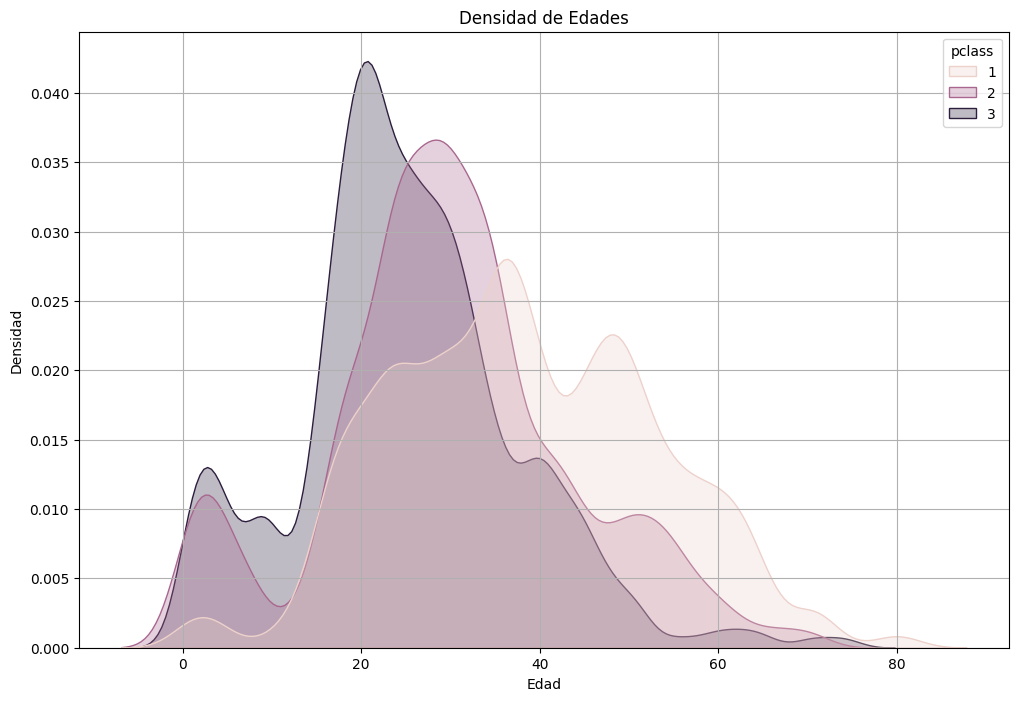

In [92]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = df, x = df['age'],hue = 'pclass',color='viridis',fill = True, bw_adjust = 0.5, common_norm = False, alpha = 0.3)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)

## Agrego columna "family_size"

In [93]:
# Cuantificar la cantidad de personas por familia (Sumar pasajero + sibsp + parch)
# Lo sumo a df train = df y a df_test

df['family_size'] = df['parch'] + df['sibsp'] + 1
df_test['family_size'] = df['parch'] + df['sibsp'] + 1


In [94]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare,family_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


- Family Size: 
En promedio todos fueron con 1 persona más aproximadamente. La familia que más personas tenía eran 11 

In [95]:
# Veo valores unicos de family size
df["family_size"].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

Creo 3 grupos
- Solo 1
- Familia chica 2 - 3 
- Familia mediana 3 a 5 
- Familia grande > 6

In [96]:
import pandas as pd

# Crear una nueva columna 'family_size_group' con los rangos de tamaño de familia

# Modificar los rangos para incluir la categoría 'Solo' (1 persona)
bins = [0, 1, 2, 5, float('inf')]  # Los límites para los rangos
labels = ['solo', 'pequeña', 'mediana', 'grande']  # Las categorías

# Crear la nueva columna con las categorías correspondientes
df['family_size_group'] = pd.cut(df['family_size'], bins=bins, labels=labels, right=True)


## GroupBy

In [97]:
# Calcular la tasa de supervivencia promedio para cada grupo de tamaño de familia
df.groupby('family_size_group')['survived'].mean()


C:\Users\dalarroy\AppData\Local\Temp\ipykernel_29372\2859168637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('family_size_group')['survived'].mean()


family_size_group
solo       0.303538
pequeña    0.552795
mediana    0.568493
grande     0.148936
Name: survived, dtype: float64

- family size group:  Pareciera que las familias más numerosas tenian menos probabilidades de sobrevivir, las familias menos numerosas también y las medianas de 3 a 5 personas fueron las que mas probabilidad a sobrevivir tenian.

In [98]:
# Calcular si las 5 familias más numerosas sobrevivieorn o no
df.groupby('family_size', as_index=False) ['survived'].mean()


,family_size,survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


* Si estabas solo en el barco: Estabas justo por debajo de la media (Probabilidad de sobrevivir)
* Familias de 2 a 4 personas: Mucha probabilidad de sobrevivir!
* A partir de 5 personas: Disminuye nuevamente la probabilidad a sobrevivir

In [99]:
# Calcular si quienes viajaban solos tuvieron mas chances de sobrevivir o no
df[df['family_size'] == 1]['survived'].mean()

np.float64(0.30353817504655495)

In [100]:
# Ver si la persona mas vieja se salvo y la mas joven

In [101]:
# Ver si el ticket mas repetido se salvo

In [102]:
# Agrupar survived por sexo

In [103]:
# Agrupar survived por clase

In [104]:
# Agrupar survived por t

## `Preprocesamiento`

In [105]:
# Elimino la columna cabin 
df.drop('cabin', axis = 1, inplace = True)

In [106]:
# Rellenar valores faltantes en 'embarked' con el valor más frecuente "moda"
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # Inplace guarda sobre "si mismo" los cambios

C:\Users\dalarroy\AppData\Local\Temp\ipykernel_29372\1748690932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # Inplace guarda sobre "si mismo" los cambios


In [107]:
# Relleno valores nulos de 'age' 
df['age'].fillna(df['age'].median(), inplace=True) # Inplace guarda sobre "si mismo" los cambios

C:\Users\dalarroy\AppData\Local\Temp\ipykernel_29372\770188951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True) # Inplace guarda sobre "si mismo" los cambios
